<a href="https://www.kaggle.com/code/mohammadtanvirul/heart-attack-analysis-prediction?scriptVersionId=149808212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Analyzing and predicting heart attacks through data analysis, data visualization, machine learning, and deep learning techniques**

**Background:**
* The dataset is designed for the classification of heart attacks, a critical medical condition.
* It is used for analytical and machine learning tasks related to predicting the likelihood of a heart attack based on various medical attributes.


**Dataset Size:**
* The dataset contains 304 rows (samples) and 14 columns (features).

**Features:**
* The dataset includes several features (attributes) that provide information about patients and their health conditions. These features can be used to predict the likelihood of a heart attack. Some of the key features include:
**age:** The age of the patient.
**sex:** The gender of the patient (0 = female, 1 = male).
**cp:** Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
**restbps:** Resting blood pressure (in mm Hg).
**chol:** Serum cholesterol level (in mg/dl).
**fbs:** Fasting blood sugar (> 120 mg/dl) (1 = true, 0 = false).
**restecg:** Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy).
**thalach:** Maximum heart rate achieved.
**exang:** Exercise-induced angina (1 = yes, 0 = no).
**oldpeak:** ST depression induced by exercise relative to rest.
**slope:** Slope of the peak exercise ST segment.
**ca:** Number of major vessels colored by fluoroscopy.
**thal:** Thalassemia (a type of blood disorder) results (3 = normal, 6 = fixed defect, 7 = reversible defect).
**Target Variable:**
The target variable in this dataset is often output or target, which indicates the presence (1) or absence (0) of a heart attack

****Importing Libraries****

The code starts by importing necessary libraries, including pandas, numpy, matplotlib.pyplot, seaborn, and plotly.express. These libraries are used for data manipulation, analysis, and visualization.

**Data Loading:**

* The dataset is loaded from a CSV file named 'heart.csv' using pd.read_csv(). The loaded data is stored in a DataFrame named df.

**Data Exploration:**

* df.info() is used to display information about the dataset, including data types and the number of non-null values in each column.
* df.isnull().sum() checks for missing values in each column and shows the count of missing values (which is zero in this case).
* df.duplicated().sum() checks for duplicated rows, and since there's one duplicated row, it is removed using df.drop_duplicates().

**Data Visualization:** Several data visualizations are created to explore the dataset.

* A histogram showing the distribution of ages.
* Boxplots and count plots to visualize relationships between variables, such as cholesterol levels by gender and the distribution of chest pain types.
* Pie charts to display the distribution of heart disease, chest pain types, fasting blood sugar levels, exercise-induced angina, and more.
* Histograms of numerical features.

**Outlier Removal:**

* A custom function Remove_outliers is defined to remove outliers using the Interquartile Range (IQR) method. Outliers are replaced with NaN values.

**Numerical Feature Boxplots:**

* A custom function boxplot_drawer is defined to draw boxplots for numerical features. These boxplots visualize the distribution and presence of outliers in these features. 

**Correlation Matrix: **

* A correlation matrix is computed using df.corr(). The matrix is then visualized as a heatmap using Seaborn's sns.heatmap(). This helps visualize the relationships between different features in the dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools





In [2]:
#read csv file  
df=pd.read_csv('/kaggle/input/heartdataset/heart.csv')


In [3]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.duplicated().sum()    # Count the number of duplicated rows in the DataFrame df.

1

In [7]:
df[df.duplicated()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(302, 14)

In [10]:
for col in df.columns:
    print(f'column {col}')
    print('...............................')
    print(df[col].value_counts(),'\n')

column age
...............................
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64 

column sex
...............................
sex
1    206
0     96
Name: count, dtype: int64 

column cp
...............................
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64 

column trtbps
...............................
trtbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
9

In [11]:
df.describe() 

age         sex          cp      trtbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [12]:
# drow boxplot of PhysicalHealth
def boxplot_drawer(Column_Name):
    sns.boxplot(y=Column_Name,data=df)

The **Remove_outliers** function calculates the first and third quartiles and the interquartile range for a specified column and removes outliers from that column in the DataFrame by replacing them with **NaN** values. This is a common technique for cleaning and preparing data for analysis, particularly when dealing with numerical data.

In [13]:
def Remove_outliers(Column_Name):
    q1=df[Column_Name].quantile(0.25)
    q3=df[Column_Name].quantile(0.75)
    iqr=q3-q1
    df[Column_Name][(df[Column_Name]<(q1-1.5*iqr))|(df[Column_Name]>(q3+1.5*iqr))]=np.nan

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
df.dropna(inplace=True)

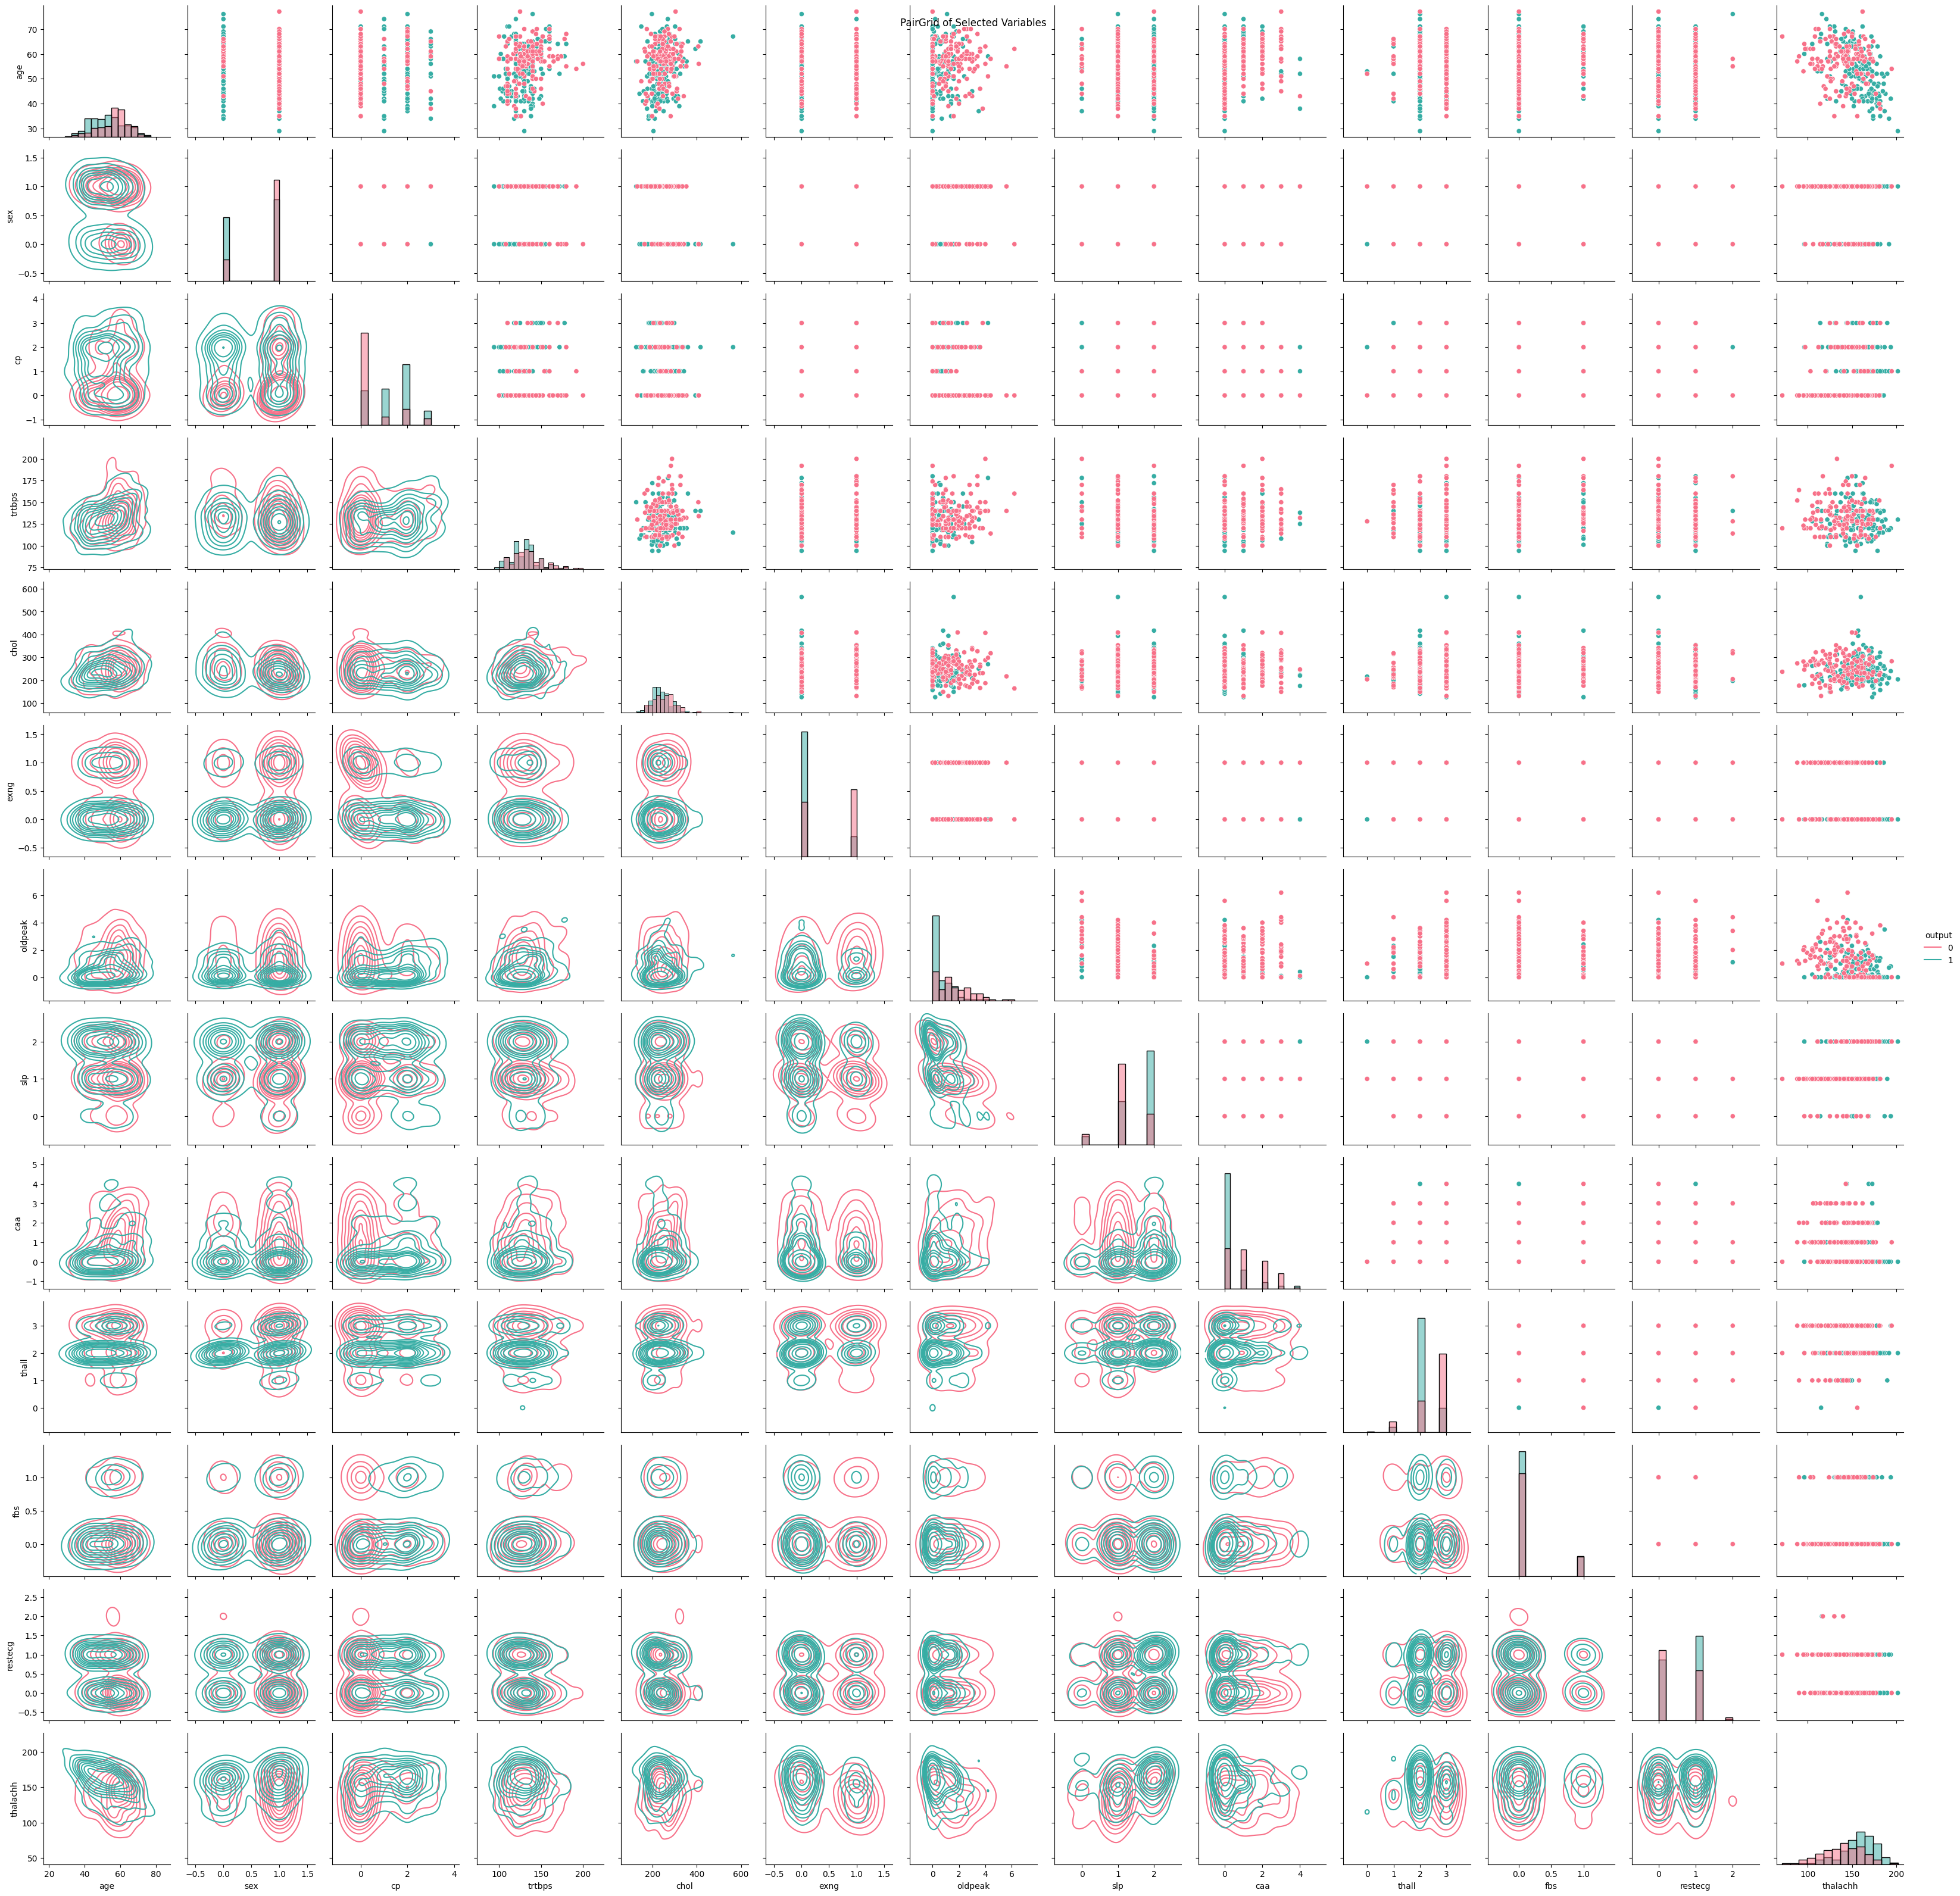

In [16]:
g = sns.PairGrid(df[['age','sex','cp','trtbps','chol','exng', 'oldpeak', 'slp', 'caa', 'thall','fbs','restecg','thalachh', 'output']], hue='output', palette='husl')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.add_legend()
g.fig.suptitle('PairGrid of Selected Variables')
plt.show()

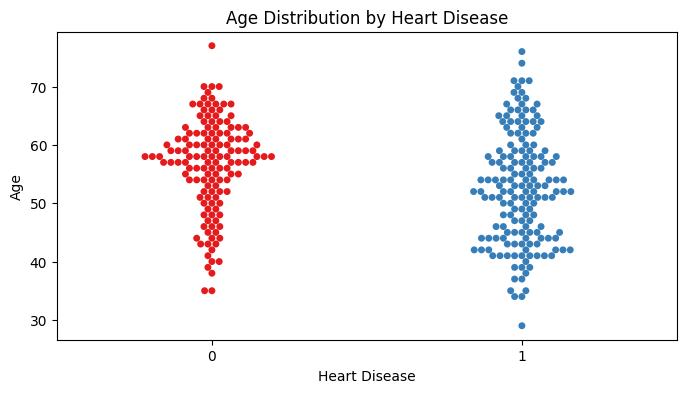

In [17]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x='output', y='age', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

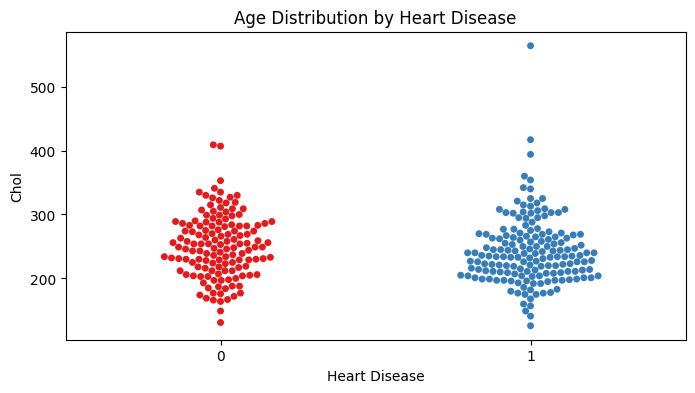

In [18]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x='output', y='chol', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Chol')
plt.title('Age Distribution by Heart Disease')
plt.show()

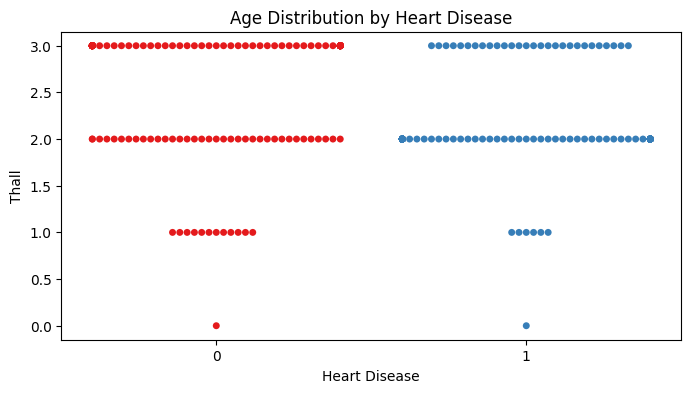

In [19]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x='output', y='thall', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Thall')
plt.title('Age Distribution by Heart Disease')
plt.show()

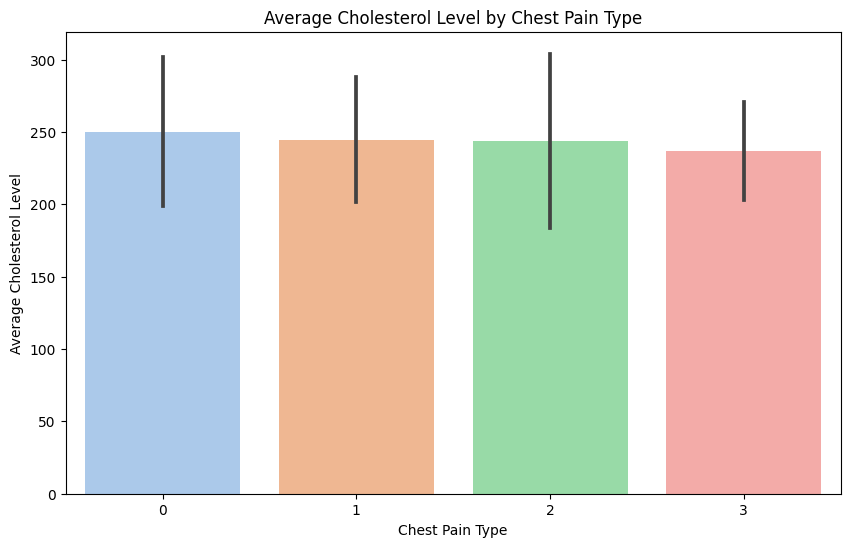

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='chol', data=df, ci='sd', palette='pastel')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Level by Chest Pain Type')
plt.show()

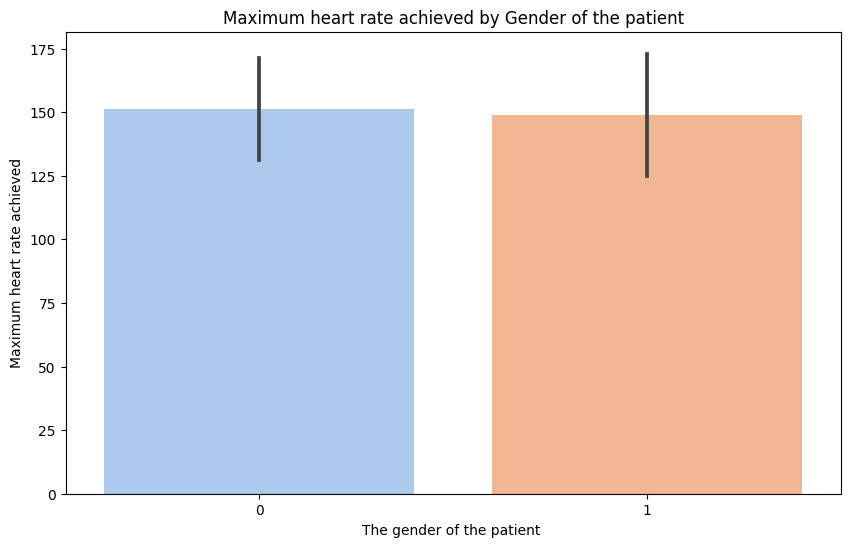

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='thalachh', data=df, ci='sd', palette='pastel')
plt.xlabel('The gender of the patient ')
plt.ylabel('Maximum heart rate achieved')
plt.title('Maximum heart rate achieved by Gender of the patient')
plt.show()

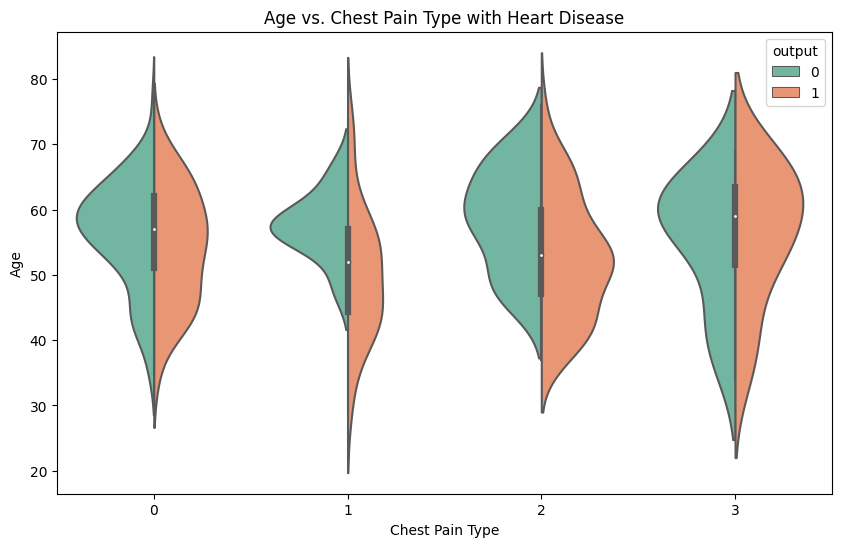

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='age', data=df, hue='output', split=True, palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Age vs. Chest Pain Type with Heart Disease')
plt.show()

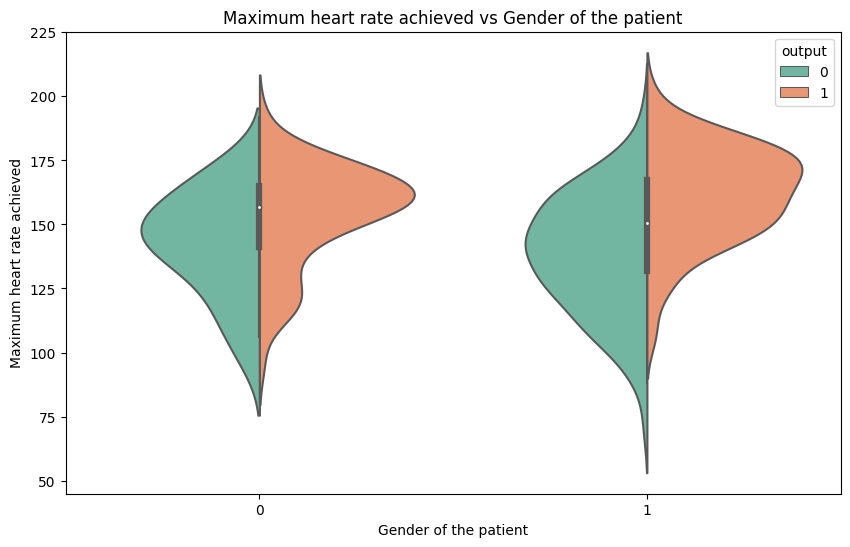

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='thalachh', data=df, hue='output', split=True, palette='Set2')
plt.xlabel('Gender of the patient')
plt.ylabel('Maximum heart rate achieved')
plt.title('Maximum heart rate achieved vs Gender of the patient')
plt.show()

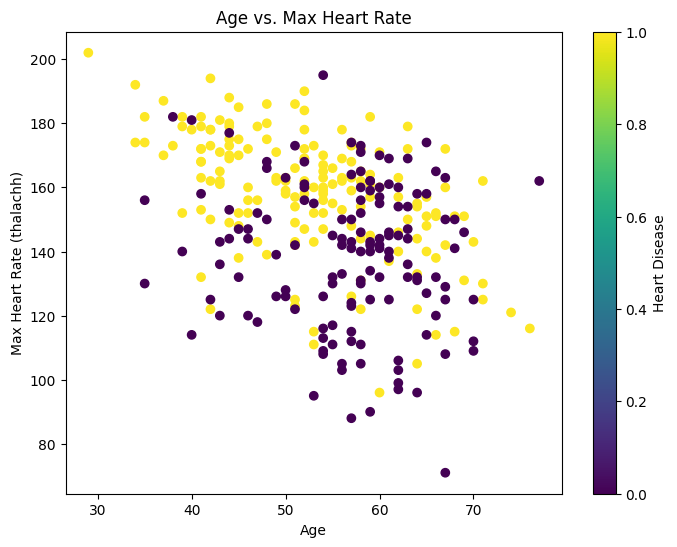

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalachh)')
plt.title('Age vs. Max Heart Rate')
plt.colorbar(label='Heart Disease')
plt.show()

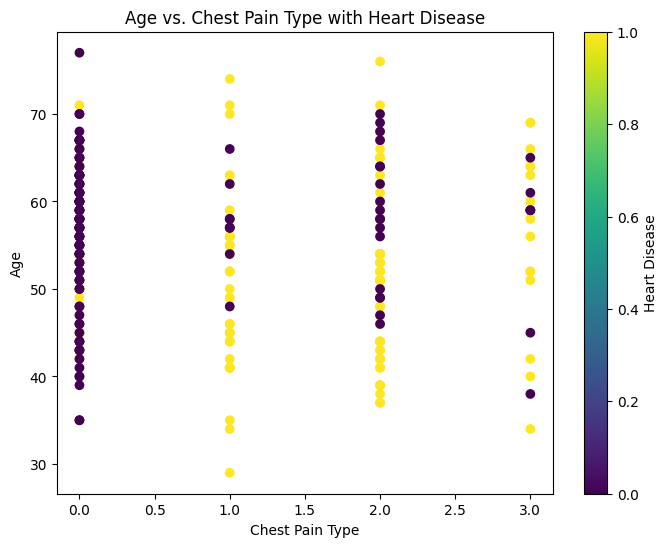

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['cp'], df['age'], c=df['output'], cmap='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Age vs. Chest Pain Type with Heart Disease')
plt.colorbar(label='Heart Disease')
plt.show()



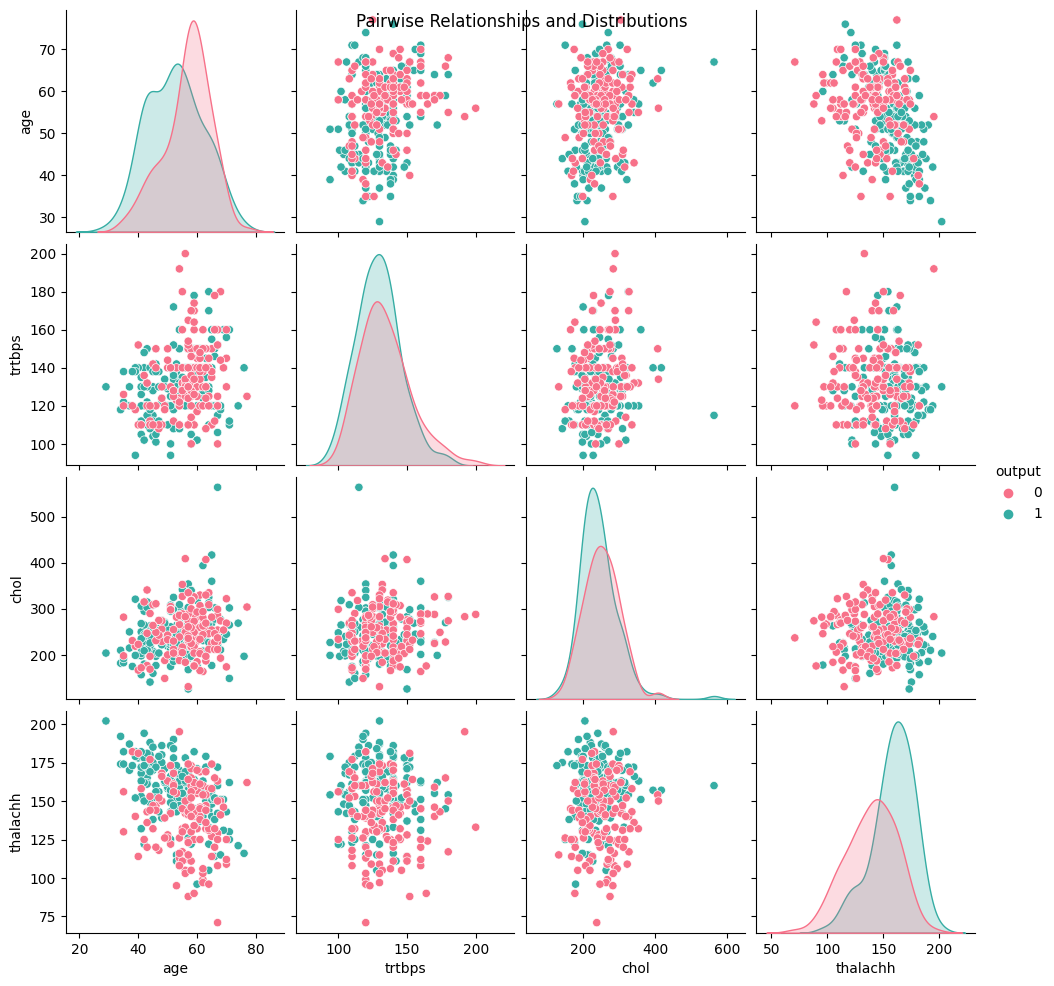

In [26]:
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Relationships and Distributions')
plt.show()

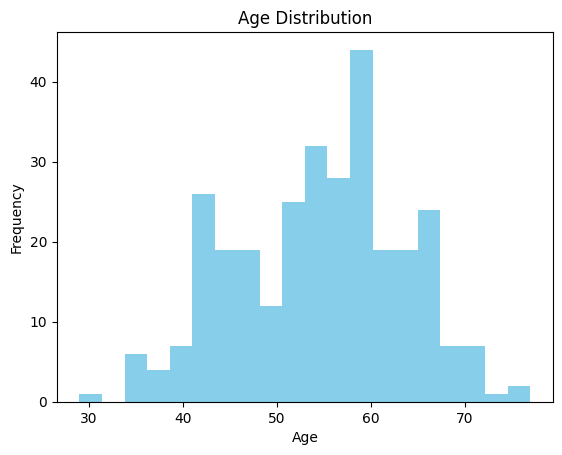

In [27]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

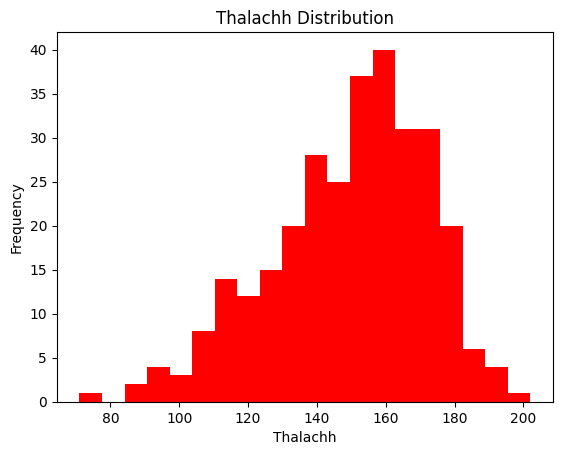

In [28]:
plt.hist(df['thalachh'], bins=20, color='red')
plt.xlabel('Thalachh')
plt.ylabel('Frequency')
plt.title('Thalachh Distribution')
plt.show()

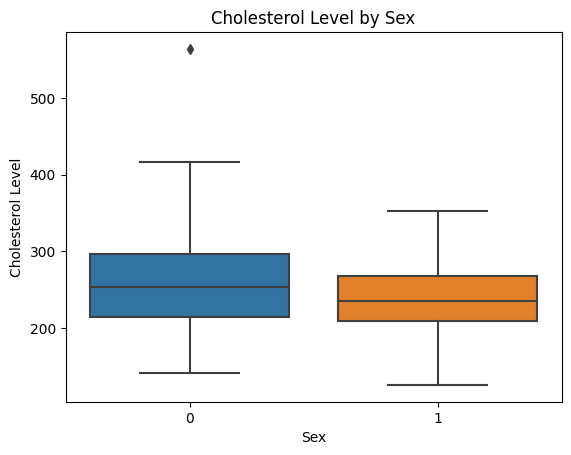

In [29]:
import seaborn as sns

sns.boxplot(x='sex', y='chol', data=df)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level by Sex')
plt.show()

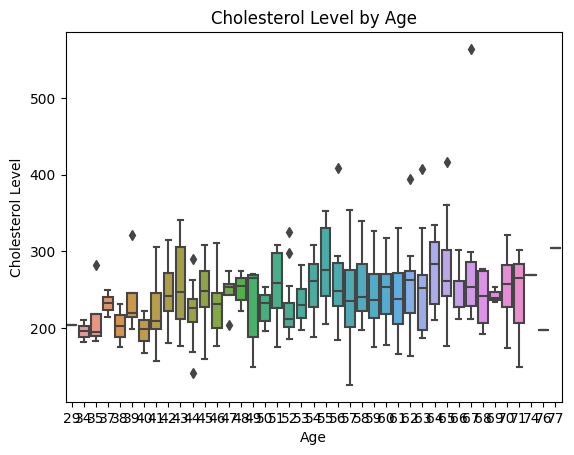

In [30]:
import seaborn as sns

sns.boxplot(x='age', y='chol', data=df)
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level by Age')
plt.show()

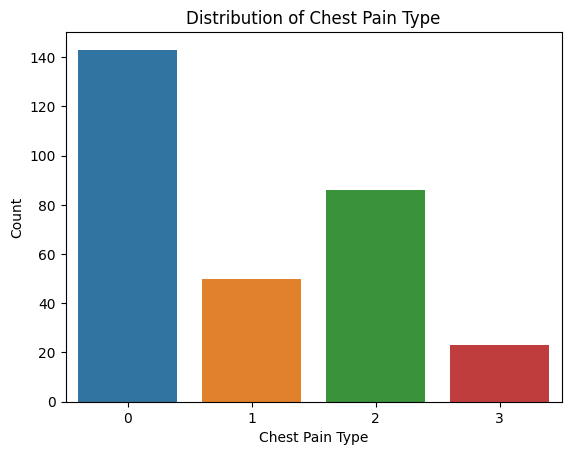

In [31]:

sns.countplot(x='cp', data=df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type')
plt.show()

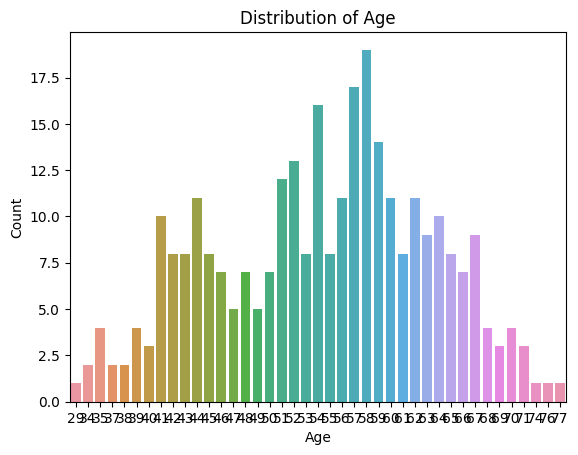

In [32]:
sns.countplot(x='age', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

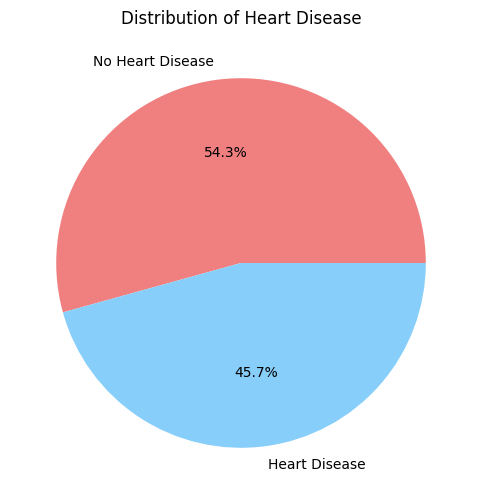

In [33]:
plt.figure(figsize=(6, 6))
labels = ['No Heart Disease', 'Heart Disease']
sizes = df['output'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Heart Disease')
plt.show()

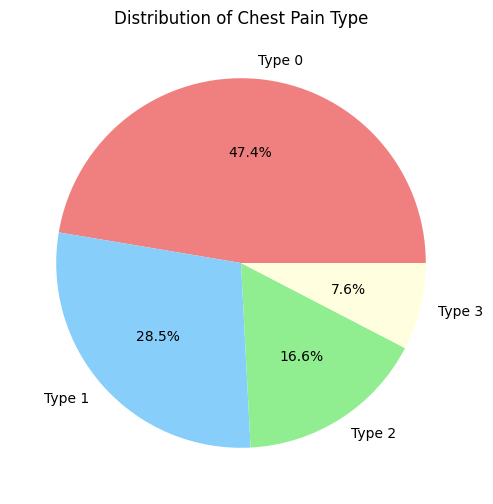

In [34]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
sizes = df['cp'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Chest Pain Type')
plt.show()

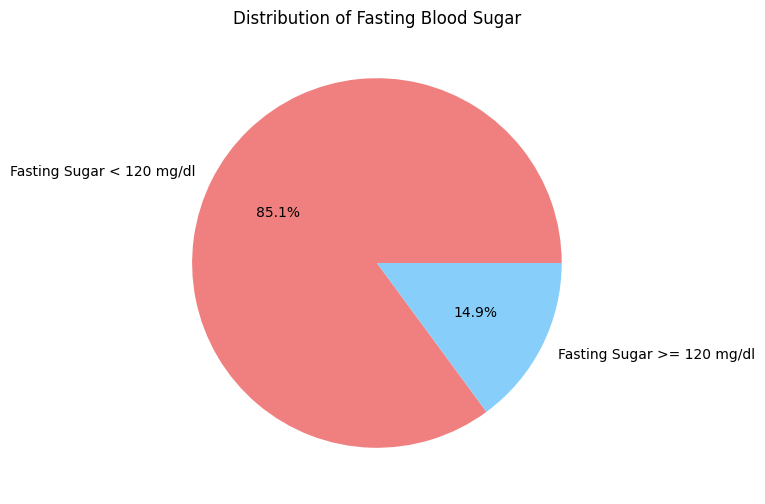

In [35]:
plt.figure(figsize=(6, 6))
labels = ['Fasting Sugar < 120 mg/dl', 'Fasting Sugar >= 120 mg/dl']
sizes = df['fbs'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

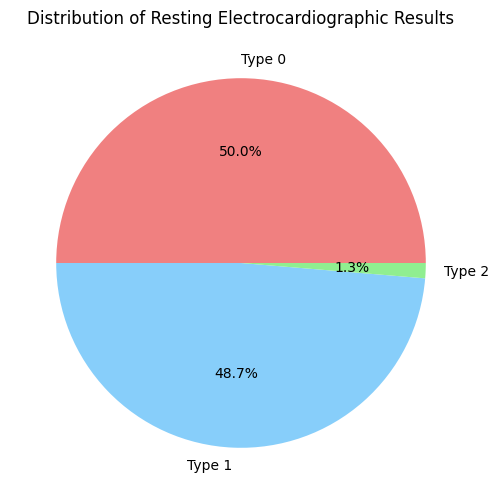

In [36]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2']
sizes = df['restecg'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Resting Electrocardiographic Results')
plt.show()

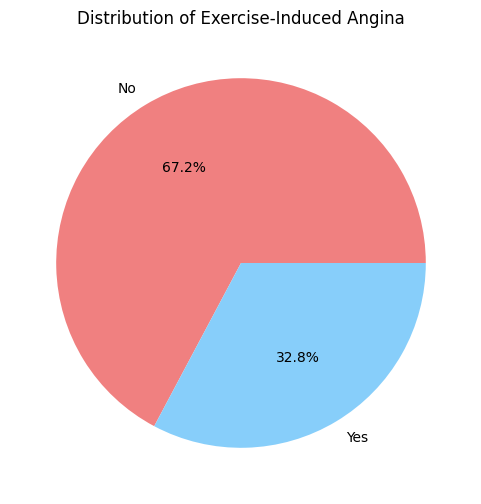

In [37]:
plt.figure(figsize=(6, 6))
labels = ['No', 'Yes']
sizes = df['exng'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Exercise-Induced Angina')
plt.show()

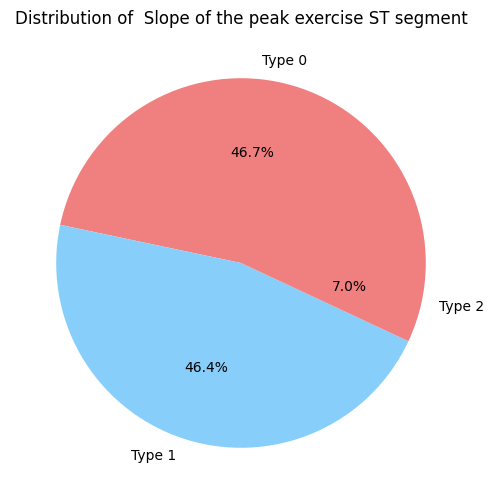

In [38]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2']
sizes = df['slp'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of  Slope of the peak exercise ST segment')
plt.show()

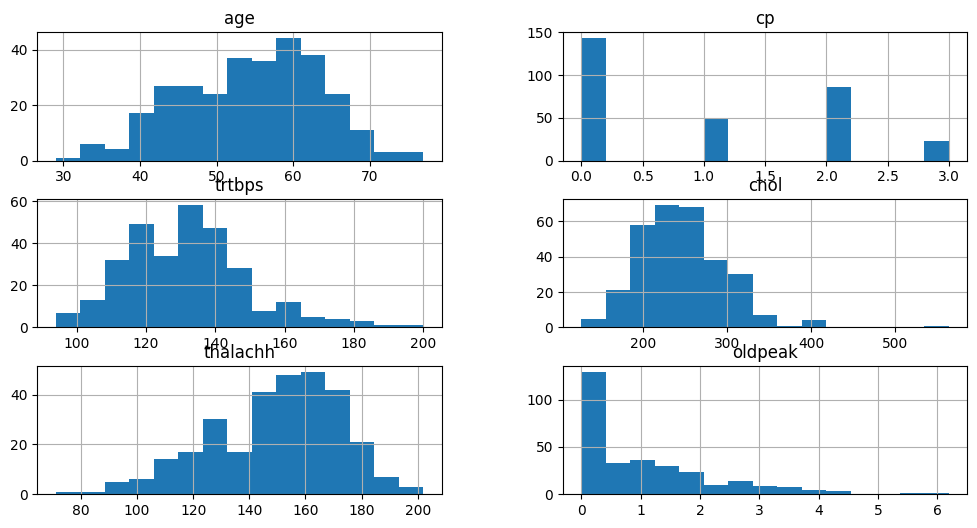

In [39]:
# Explore the distribution of numerical features
numeric_features = ['age','cp', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[numeric_features].hist(bins=15, figsize=(12, 6))
plt.show()

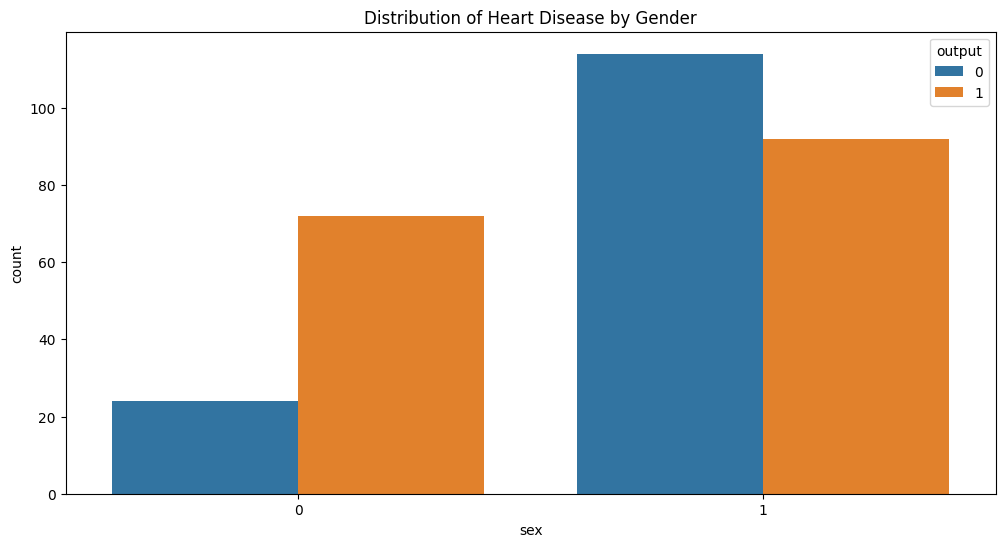

In [40]:
# Explore the distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=df, hue='output')
plt.title('Distribution of Heart Disease by Gender')
plt.show()

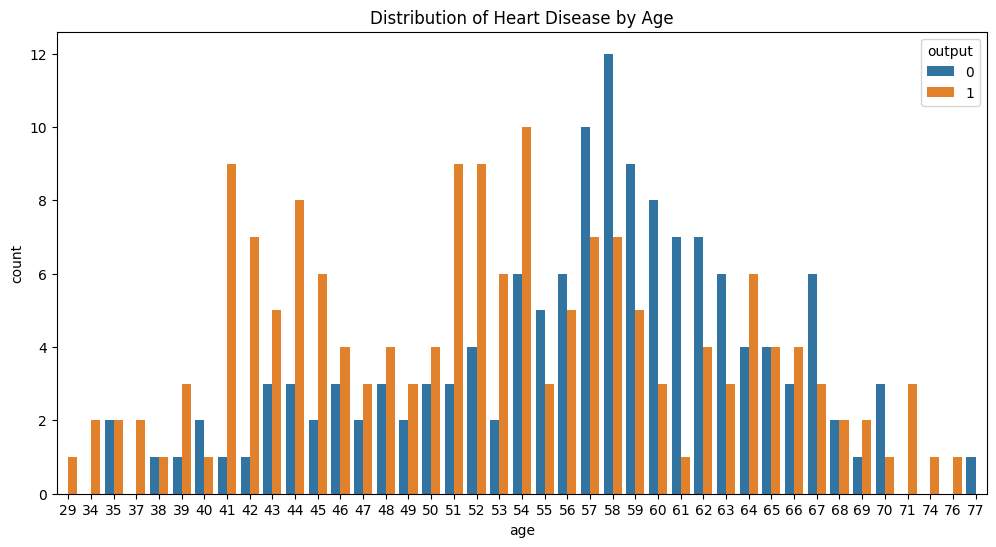

In [41]:
# Explore the distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df, hue='output')
plt.title('Distribution of Heart Disease by Age')
plt.show()

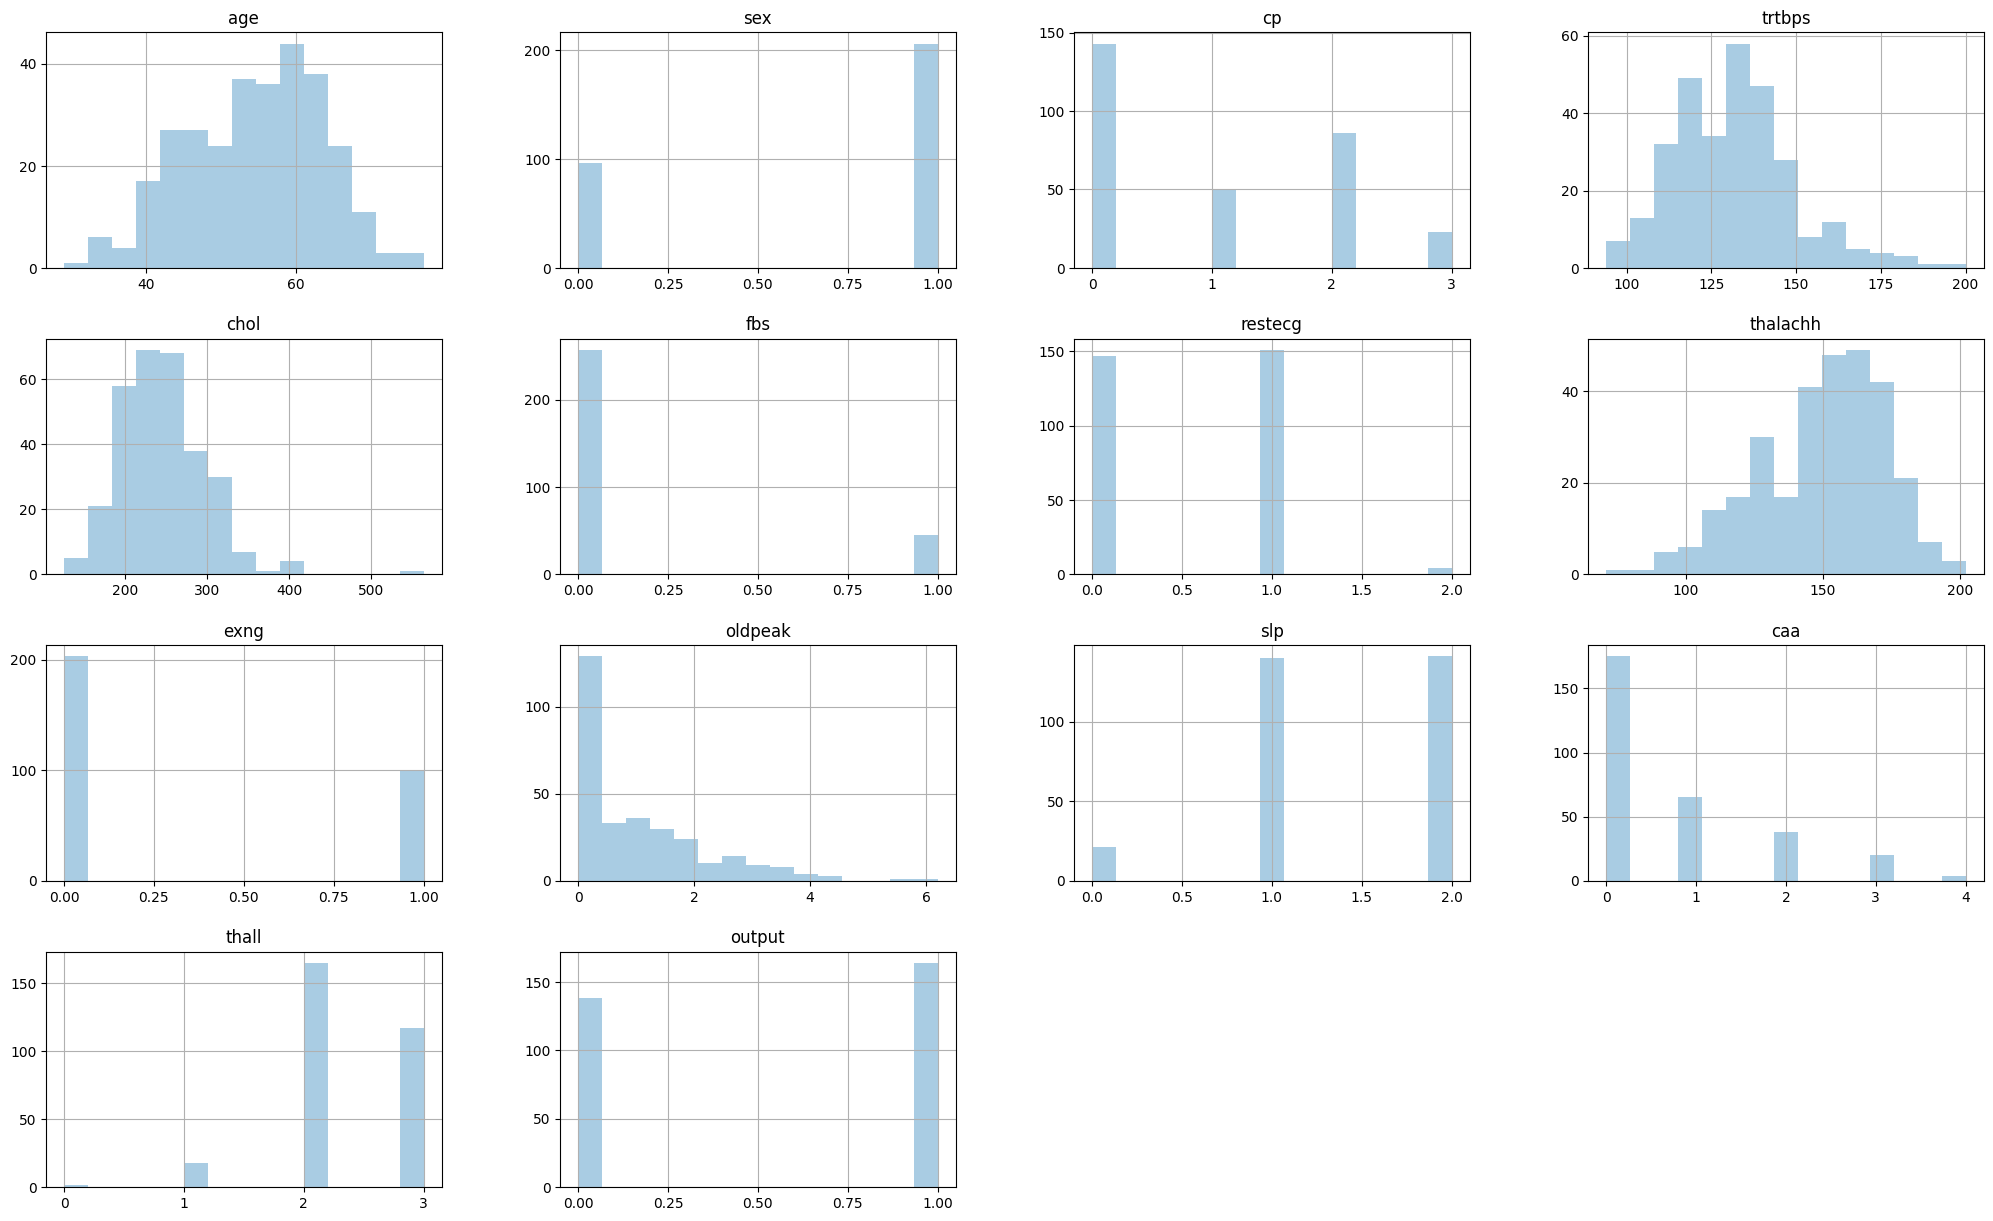

In [42]:
color = '#a9cce3'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

<Axes: >

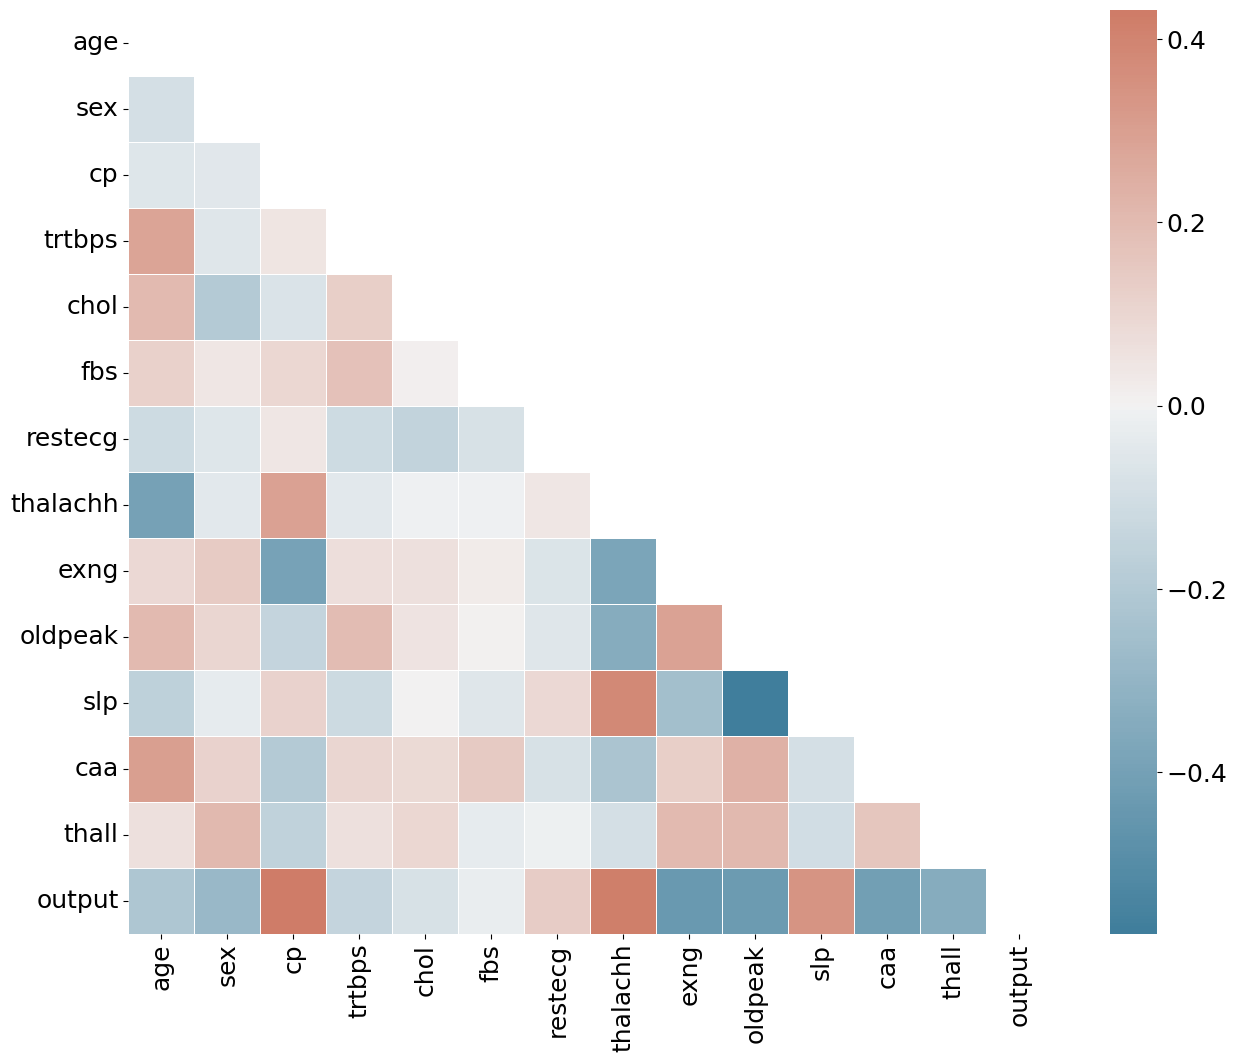

In [43]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [44]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

<Axes: >

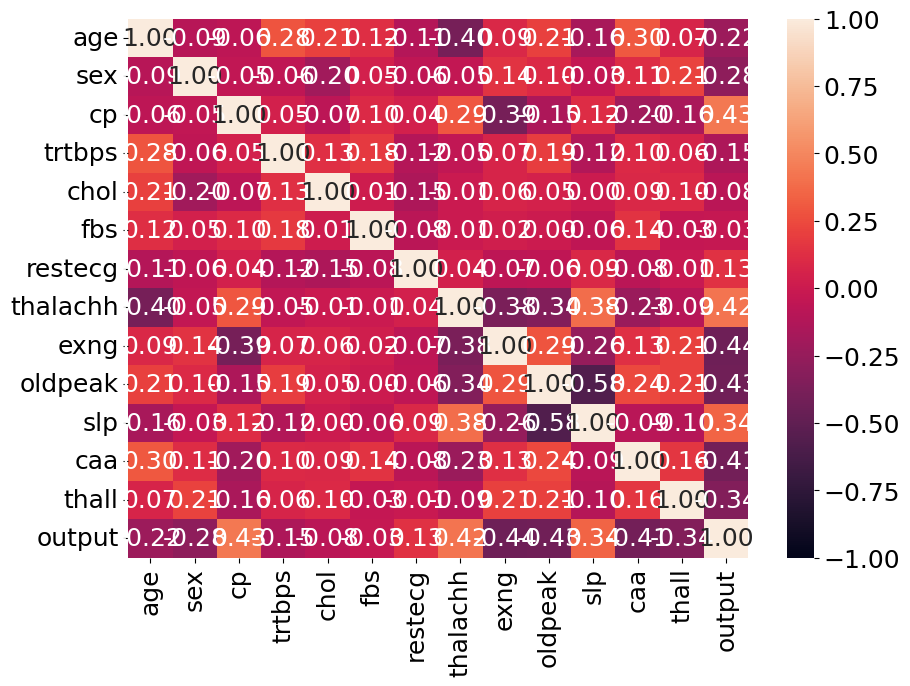

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,fmt=".2f")

**Data Preprocessing:**
* The code starts by importing necessary libraries, such as pandas, scikit-learn, and various modules from scikit-learn.
* It reads a dataset into a DataFrame named df.
* Numeric features in the dataset, namely 'trtbps', 'chol', 'thalachh', and 'oldpeak', are standardized using StandardScaler. This step is crucial for many machine learning algorithms to perform effectively.

**Logistic Regression Model:**
* A logistic regression model is created and trained on the dataset.
* The data is split into training and testing sets using train_test_split.
* The model is fitted to the training data using fit.
* Predictions are made on the test set using predict.
* The model's performance is evaluated using accuracy, a classification report, and a confusion matrix.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8360655737704918


In [52]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[25  4]
 [ 6 26]]


In [53]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score



In [54]:
#data preprocessing
numeric_columns = ['trtbps', 'chol', 'thalachh', 'oldpeak']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [55]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred_LR = LR_model.predict(X_test)

In [56]:
# Model Evaluation
print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))
print("Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print("Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print("Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print("Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_LR))

Score the X-train with Y-train is :  0.8589211618257261
Score the X-test  with Y-test  is :  0.8360655737704918
Model Evaluation Logistic R : mean absolute error is  0.16393442622950818
Model Evaluation Logistic R : mean squared  error is  0.16393442622950818
Model Evaluation Logistic R : median absolute error is  0.0
Model Evaluation Logistic R : accuracy score  0.8360655737704918


**Decision Tree Classifier Model:**

* A Decision Tree Classifier is a machine learning model for classification tasks. It recursively splits data based on important features, making decisions at each node. It's trained on labeled data, can be pruned to prevent overfitting, and is evaluated using metrics like accuracy. Hyperparameters can be tuned for optimization. It's implemented in Python using libraries like scikit-learn. Similar to the logistic regression model, it is fitted to the training data, predictions are made on the test set, and its performance is evaluated.

**Feature Importance Analysis:**

* Feature importance for the Decision Tree Classifier model is calculated, and the most important features are displayed.

In [57]:
#DecisionTreeClassifier
Tree_model=DecisionTreeClassifier(max_depth=10)

# fit model
Tree_model.fit(X_train,y_train)
y_pred_T =Tree_model.predict(X_test)


In [58]:
# Score X and Y - test and train
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))


Score the X-train with Y-train is :  0.995850622406639
Score the X-test  with Y-test  is :  0.8032786885245902
Model Evaluation Decision Tree : accuracy score  0.8032786885245902


In [59]:
# Model Preperation:
X = df.drop(columns="output")
y = df.output

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [61]:
# Select  Important columns
# The .tolist() method is used to convert the array of feature importances into a Python list. So, a is now a list of feature importance scores.


a = Tree_model.feature_importances_.tolist()
df_result=pd.DataFrame()
df_result["Columns"] = X_train.columns
df_result["Important Rate"] = a
df_result = df_result.sort_values(by="Important Rate", ascending=False)

df_result=df_result.reset_index(drop=True)

df_result

Columns  Important Rate
0      thall        0.248719
1        age        0.136892
2        caa        0.130062
3    oldpeak        0.121494
4     trtbps        0.083042
5        slp        0.067261
6         cp        0.067060
7   thalachh        0.052335
8        sex        0.050743
9       chol        0.032213
10       fbs        0.010178
11   restecg        0.000000
12      exng        0.000000

**Support Vector Classifier (SVC) Model:**

* A Support Vector Classification (SVC) model is a machine learning algorithm used for binary classification tasks. It finds a hyperplane that maximizes the margin between classes, handles non-linear data using kernel functions, and relies on support vectors. Regularization parameters are used to prevent overfitting. SVC is effective in various applications, with hyperparameter tuning being essential for optimal performance.


In [62]:
# using the model SVC
svc_model=SVC()

# fit model
svc_model.fit(X_train,y_train)
y_pred_svc =svc_model.predict(X_test)

In [63]:
print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.668141592920354
Score the X-test  with Y-test  is :  0.6052631578947368
Model Evaluation Decision Tree : accuracy score  0.6052631578947368


**Support Vector Regression (SVR) model:**
* Support Vector Regression (SVR) is a regression algorithm that aims to predict continuous numerical values. It finds a hyperplane that minimizes prediction errors while allowing a margin of tolerance (epsilon). The choice of kernel and hyperparameters like epsilon and C influences the model's performance. SVR is effective for both linear and nonlinear regression tasks and can be implemented using libraries like scikit-learn in Python.






In [64]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

In [65]:
print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.2774931472323884
Score the X-test  with Y-test  is :  0.30099048955869934
Model Evaluation Decision Tree : accuracy score  0.6052631578947368


**K-Nearest Neighbors (KNN) Classifier:**

* K-Nearest Neighbors (KNN) is a simple classification algorithm. It classifies data points by looking at the class of their nearest neighbors. Key parameters include "k" (number of neighbors) and the distance metric. KNN is easy to understand but computationally expensive for large datasets and may not work well with high-dimensional data. It's useful for small to moderately sized datasets and applications like recommendation systems and image classification.

In [66]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = 11)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

In [67]:
print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print("Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.7654867256637168
Score the X-test  with Y-test  is :  0.7105263157894737
Model Evaluation K Neighbors Classifier : accuracy score  0.7105263157894737


**Random Forest Classifier:**
* A Random Forest Classifier is a machine learning algorithm that combines multiple decision trees to make predictions. It's robust, handles noisy data, and offers good generalization. It uses bootstrapping and feature randomness to reduce overfitting. It's widely used for classification tasks due to its reliability and performance.

In [68]:
# using the model Random Forest Classifier

RF_model = RandomForestClassifier(n_estimators = 300)
RF_model.fit(X_train, y_train)

y_pred_r = RF_model.predict(X_test)

In [69]:
print("Score the X-train with Y-train is : ", RF_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RF_model.score(X_test,y_test))
print("Model Evaluation Random Forest Classifier : accuracy score " , accuracy_score(y_test,y_pred_r))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.8947368421052632
Model Evaluation Random Forest Classifier : accuracy score  0.8947368421052632


**Machine Learning Pipeline**
* A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

In [70]:
# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic_regression', LogisticRegression())
])

In [71]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [72]:
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8552631578947368
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.90      0.88      0.89        49

    accuracy                           0.86        76
   macro avg       0.84      0.85      0.84        76
weighted avg       0.86      0.86      0.86        76



In [73]:
# Create a pipeline with StandardScaler and Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Optional: You can include data preprocessing steps in the pipeline
    ('decision_tree', DecisionTreeClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())])

In [74]:
#  Evaluate the model on the testing data and calculate accuracy
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8157894736842105


In [75]:
# Create a pipeline with StandardScaler and Support Vector Classifier


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC())  # SVC classifier
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [76]:
#Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8552631578947368


In [77]:
# Create a pipeline with StandardScaler and Support Vector Regression



pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('svr', SVR())  # Support Vector Regression
])


# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)


In [78]:
#Evaluate the model's accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 0.09502938916873699
R-squared (R2) Score: 0.5851173455490365


In [79]:
# Create a pipeline with StandardScaler and K Nearest Neighbour

pipeline = Pipeline([
    ('scaler', StandardScaler()),     # Standardize the features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # KNN classifier with k=5
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [80]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [81]:

# Create a pipeline with a Random Forest classifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


****RNN Model****

A Recurrent Neural Network (RNN) is a type of artificial neural network that is particularly well-suited for handling sequences of data. Unlike feedforward neural networks, which process data in a one-way flow from input to output, RNNs have an internal hidden state that allows them to maintain and update information over time. This makes them useful for tasks involving time series data, natural language processing, speech recognition, and more.

Here's a brief explanation of how RNNs work:

**Recurrent Structure:** The fundamental building block of an RNN is the recurrent neuron or cell. It takes an input at each time step and produces an output and an internal hidden state. This hidden state serves as a kind of "memory" that stores information from previous time steps and can be used in future time steps.

**Sequence Processing:** RNNs are designed to process sequences of data, where each element in the sequence corresponds to a time step. This can be characters in a sentence, words in a document, or data points in a time series. At each time step, the RNN takes the current input and the previous hidden state as input and produces an output and an updated hidden state.

**Learning:** RNNs are trained using backpropagation through time (BPTT). This is similar to the backpropagation algorithm used in feedforward neural networks, but it's adapted to the recurrent nature of RNNs. The goal is to adjust the model's parameters so that it can make accurate predictions or classifications at each time step, taking into account the information from past time steps.

**Vanishing and Exploding Gradients:** One challenge with RNNs is the vanishing and exploding gradient problem. Because gradients are propagated through time, they can either become very small (vanishing) or very large (exploding), which can make training difficult. To mitigate this, various RNN architectures have been developed, including the Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU), which are designed to better capture long-term dependencies.





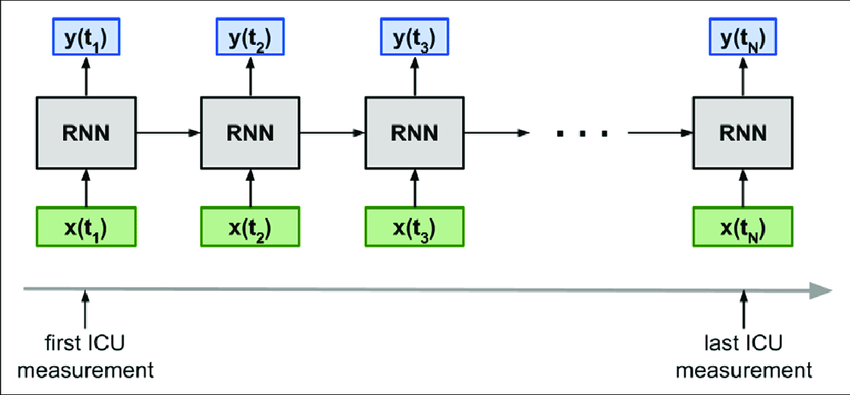]

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [84]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Reshape data for RNN input (sequence length, number of features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [88]:
# Build the RNN model
model = keras.Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1, activation='sigmoid')
])

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/10
6/6 [==============================] - 2s 66ms/step - loss: 0.6703 - accuracy: 0.5208 - val_loss: 0.6448 - val_accuracy: 0.5510
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6194 - accuracy: 0.5833 - val_loss: 0.5988 - val_accuracy: 0.7143
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.5750 - accuracy: 0.6771 - val_loss: 0.5609 - val_accuracy: 0.7551
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.5385 - accuracy: 0.7396 - val_loss: 0.5296 - val_accuracy: 0.7959
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.5068 - accuracy: 0.8021 - val_loss: 0.5039 - val_accuracy: 0.7959
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.4813 - accuracy: 0.8229 - val_loss: 0.4832 - val_accuracy: 0.7959
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.4596 - accuracy: 0.8333 - val_loss: 0.4671 - val_accuracy: 0.7959
Epoch 8/10
6/6 [=================

In [90]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
# Define your RNN model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [92]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Epoch 1/50
8/8 [==============================] - 5s 137ms/step - loss: 0.5230 - accuracy: 0.4523 - val_loss: 0.4664 - val_accuracy: 0.4754
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4651 - accuracy: 0.4523 - val_loss: 0.4119 - val_accuracy: 0.4754
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3991 - accuracy: 0.4523 - val_loss: 0.3495 - val_accuracy: 0.4754
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3299 - accuracy: 0.4647 - val_loss: 0.2793 - val_accuracy: 0.5246
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2569 - accuracy: 0.5643 - val_loss: 0.2176 - val_accuracy: 0.6885
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1861 - accuracy: 0.7344 - val_loss: 0.1787 - val_accuracy: 0.7869
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1573 - accuracy: 0.7801 - val_loss: 0.1586 - val_accuracy: 0.8033
Epoch 8/50
8/8 [================

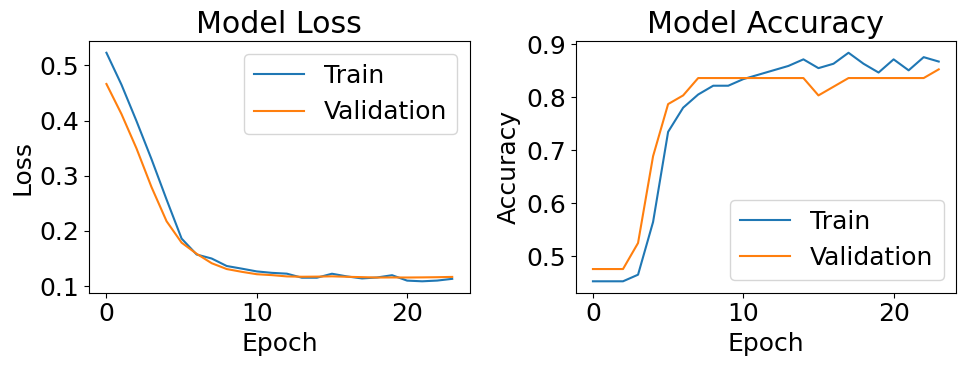

In [93]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Plot training history (loss and accuracy)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot training & validation loss values
plt.subplot(121)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [94]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [95]:
# Define a function to create the RNN model
def create_rnn_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, dropout=dropout_rate, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [96]:
# Wrap the Keras model in a scikit-learn classifier
rnn_classifier = KerasClassifier(build_fn=create_rnn_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.4],
    'learning_rate': [0.001, 0.01]
}

In [97]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rnn_classifier, param_grid=param_grid, cv=3, verbose=2)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_estimator.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....dropout_rate=0.2, learning_rate=0.001, units=50; total time=   3.1s
[CV] END ....dropout_rate=0.2, learning_rate=0.001, units=50; total time=   4.2s
[CV] END ....dropout_rate=0.2, learning_rate=0.001, units=50; total time=   3.4s
[CV] END ...dropout_rate=0.2, learning_rate=0.001, units=100; total time=   2.9s
[CV] END ...dropout_rate=0.2, learning_rate=0.001, units=100; total time=   3.5s
[CV] END ...dropout_rate=0.2, learning_rate=0.001, units=100; total time=   3.5s
[CV] END .....dropout_rate=0.2, learning_rate=0.01, units=50; total time=   3.0s
[CV] END .....dropout_rate=0.2, learning_rate=0.01, units=50; total time=   3.4s
[CV] END .....dropout_rate=0.2, learning_rate=0.01, units=50; total time=   3.7s
[CV] END ....dropout_rate=0.2, learning_rate=0.01, units=100; total time=   3.0s
[CV] END ....dropout_rate=0.2, learning_rate=0.01, units=100; total time=   4.5s
[CV] END ....dropout_rate=0.2, learning_rate=0.01

In [98]:
test_accuracy = 0.8852459192276001
# Convert the test accuracy to a percentage string
accuracy_percentage = f"{test_accuracy * 100:.2f}%"

# Print the accuracy as a percentage
print(f"Test Accuracy: {accuracy_percentage}")

Test Accuracy: 88.52%
